In [1]:
from pathlib import Path
from openai import OpenAI
import os
import pandas as pd
import nltk
import ast
from collections import Counter
def print_full(x):
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 2000)
    pd.set_option('display.float_format', '{:20,.2f}'.format)
    pd.set_option('display.max_colwidth', None)
    print(x)
    pd.reset_option('display.max_rows')
    pd.reset_option('display.max_columns')
    pd.reset_option('display.width')
    pd.reset_option('display.float_format')
    pd.reset_option('display.max_colwidth')

import networkx as nx
from networkx import Graph
import matplotlib.pyplot as plt

In [ ]:
# co-occurance network?

In [ ]:
# either visualize without indicating frequencies or by back-fixing the sample 

In [2]:
df = pd.read_csv(R'X:\5_Research\Paul\data\genes_of_technology\full_patent_data_lens_marine_2689_familychecked_fulltxts_sentences_GPT_pve_ind.csv', index_col = 0)

In [3]:
#split ino columns for PVEs
df['pve'] = [x.split(';')[0] for x in df['GPT response_pve']]
df['pve_explanation'] = [x.split(';')[1] for x in df['GPT response_pve']]
df['pve_type'] = [x.split(';')[2] for x in df['GPT response_pve']]

In [4]:
#split ino columns for applications
df['appl_type'] = [x.split('; ')[0] for x in df['GPT response_ind']]
df['appl_explanation'] = [x.split('; ')[1] for x in df['GPT response_ind']]


In [5]:
df.head()

,keyword,patent_id,sentence,GPT response_pve,GPT response_ind,pve,pve_explanation,pve_type,appl_type,appl_explanation
0,hypertriglyceridemia,US10227392B2,"In one embodiment, the treated or prevented di...",Direct PVE; The sentence explicitly mentions t...,Medicines; The diseases and conditions mention...,Direct PVE,The sentence explicitly mentions the treatmen...,health,Medicines,"The diseases and conditions mentioned, such as..."
1,nutraceutical,US10829778B2,HPPD-inhibiting herbicides-tolerant plants her...,Direct PVE; The sentence explicitly mentions t...,Agriculture; The mention of HPPD-inhibiting he...,Direct PVE,The sentence explicitly mentions the developm...,"sustainability, pest control, nutrition",Agriculture,The mention of HPPD-inhibiting herbicide-toler...
2,environmental pressure,AU2017235608B2,"As it appears from the Examples herein, four l...",No PVE; The sentence describes technical proce...,"Biomedical research, Pharmaceuticals; The sent...",No PVE,The sentence describes technical processes an...,No PVE,"Biomedical research, Pharmaceuticals",The sentence describes a series of experiments...
3,environmentally friendl,US20140024064A1,Production of alcohols by fermentation is one ...,Direct PVE; This sentence directly mentions an...,"Biofuels, Beverages; Fermentation is a widely ...",Direct PVE,This sentence directly mentions an environmen...,sustainability,"Biofuels, Beverages",Fermentation is a widely used process in the p...
4,resistan,US9534232B2,"Furthermore, the continual use of insecticides...",Direct PVE; The sentence highlights the advers...,"Pest control, GMO crops; RNA interference (RNA...",Direct PVE,The sentence highlights the adverse environme...,sustainability,"Pest control, GMO crops",RNA interference (RNAi) technology has applica...


In [6]:
#split multiple type-responses into multiple rows
pve_types_sin = []
keywords_sin = []
appl_types_sin = []
patent_ids_sin = []
nr = 0
for pve_type in df['pve_type']:
    for single_type in pve_type.split(', '): 
        if single_type[0] != ' ':
            single_type_ph = single_type
        else: 
            single_type_ph = single_type[1:]            
        
        pve_types_sin.append(single_type_ph.lower().replace('.','').replace('biodiversity','environmental protection').replace('ecosystem health','environmental protection').replace('agriculture','food security').replace('global health','health').replace('security','safety'))
        appl_types_sin.append(list(df['appl_type'])[nr])
        keywords_sin.append(list(df['keyword'])[nr])
        patent_ids_sin.append(list(df['patent_id'])[nr])
    nr = nr+1

In [87]:
set(pve_types_sin)

{'economic prosperity',
 'environmental protection',
 'food safety',
 'health',
 'no pve',
 'nutrition',
 'pest control',
 'safety',
 'sustainability'}

In [7]:
pve_types_sin_2 = []
keywords_sin_2 = []
appl_types_sin_2 = []
patent_ids_sin_2 = []

nr = 0
for appl_type in appl_types_sin:
    for single_type in appl_type.split(','):
        if single_type[0] != ' ':
            single_type_ph = single_type.lower().replace('.','')
        else: 
            single_type_ph = single_type[1:].lower().replace('.','')
        if 'agricultur' in single_type_ph or 'crop' in single_type_ph or 'plant biotechnology' in single_type_ph: 
            single_type_ph = 'agriculture'
        elif 'aquaculture' in single_type_ph or 'aquarium' in single_type_ph: 
            single_type_ph = 'aquaculture'
        elif 'biodegradable' in single_type_ph:
            single_type_ph = 'biodegradable materials'
        elif 'biofuel' in single_type_ph:
            single_type_ph = 'biofuels'
        elif 'biomedic' in single_type_ph or 'drug' in single_type_ph or 'pharmaceutical' in single_type_ph or 'therapeutic interventions' in single_type_ph or 'disease resistance' in single_type_ph or 'medic' in single_type_ph:
            single_type_ph = 'biomedicine'
        elif 'cancer' in single_type_ph:
            single_type_ph = 'cancer therapy'
        elif 'diagnostic' in single_type_ph:
            single_type_ph = 'diagnostics'
        elif 'dietary supplements' in single_type_ph or 'food' in single_type_ph or 'infant formula' in single_type_ph or 'nutraceuticals' in single_type_ph or 'nutritional' in single_type_ph:
            single_type_ph = 'foods'
        elif 'remediation' in single_type_ph or 'environmental cleanup' in single_type_ph:
            single_type_ph = 'bioremediation'
        elif 'fertilizer' in single_type_ph:
            single_type_ph = 'fertilizers'
        elif 'genetics research' in single_type_ph:
            single_type_ph = 'genetic research'
        elif single_type_ph == 'research' or 'research tools' in single_type_ph or 'scientific research' in single_type_ph: 
            single_type_ph ='scientific research'
        elif 'biotechnology' in single_type_ph or 'enzym' in single_type_ph or 'genetic engineering' in single_type_ph:
            single_type_ph = 'general biotechnology'
        elif 'vaccine' in single_type_ph:
            single_type_ph = 'vaccines'
        elif 'vaccine' in single_type_ph:
            single_type_ph = 'vaccines'
        elif 'water treatment' in single_type_ph:
            single_type_ph = 'wastewater treatment'
        pve_types_sin_2.append(pve_types_sin[nr])
        appl_types_sin_2.append(single_type_ph)
        keywords_sin_2.append(keywords_sin[nr])
        patent_ids_sin_2.append(patent_ids_sin[nr])
    nr = nr+1

In [8]:
df_sin_dupls = pd.DataFrame(zip(keywords_sin_2, patent_ids_sin_2, pve_types_sin_2, appl_types_sin_2), columns = ['keyword', 'patent_id', 'pve_type', 'appl_type'])

In [9]:
df_sin = df_sin_dupls.drop_duplicates()

In [19]:
df_sin[['patent_id','appl_type']].drop_duplicates()

,patent_id,appl_type
0,US10227392B2,biomedicine
1,US10829778B2,agriculture
4,AU2017235608B2,biomedicine
6,US20140024064A1,biofuels
7,US20140024064A1,beverages
...,...,...
232,US6489155B1,no appl
233,US7183105B2,bioremediation
234,US7183105B2,wastewater treatment
235,AU2009299926A1,agriculture


In [20]:
s = Counter(df_sin[['patent_id','appl_type']].drop_duplicates()['appl_type'])
s.most_common()

[('biomedicine', 42),
 ('no appl', 26),
 ('agriculture', 16),
 ('foods', 15),
 ('biofuels', 14),
 ('general biotechnology', 9),
 ('bioremediation', 8),
 ('scientific research', 6),
 ('gene therapy', 5),
 ('vaccines', 4),
 ('aquaculture', 4),
 ('diagnostics', 4),
 ('wastewater treatment', 3),
 ('fertilizers', 3),
 ('cancer therapy', 2),
 ('carbon capture', 2),
 ('detergents', 2),
 ('genetic research', 2),
 ('beverages', 1),
 ('pest control', 1),
 ('immunotherapy', 1),
 ('biodegradable materials', 1),
 ('biosensors', 1),
 ('bioleaching', 1),
 ('fine chemicals', 1),
 ('dna repair technologies', 1),
 ('antibiotic production', 1),
 ('biopreservation', 1),
 ('chemical production', 1),
 ('cosmetics', 1),
 ('industrial cleaning', 1),
 ('biocatalysis', 1),
 ('bioimaging', 1)]

In [ ]:
#network viz

In [134]:
from networkx import Graph
count_edges = Counter(zip(df_sin['pve_type'], df_sin['appl_type']))

# add edges to the graph
G = Graph()
for (source, target), weight in count_edges.items():
    G.add_edge(source, target, weight=weight)

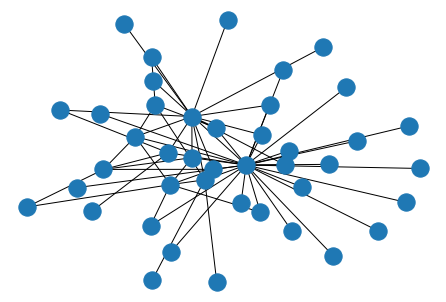

In [138]:
pos = nx.spring_layout(G, seed=225)  
nx.draw(G, pos)
plt.show()

In [140]:
nx.write_gexf(G, R'X:\5_Research\Paul\data\genes_of_technology\test_nw.gexf')

## Trash

In [6]:
pve_binary = []
for x in df['pve']: 
    if 'No' not in x: 
        pve_binary.append(1)
    else:
        pve_binary.append(0)
df['pve_binary'] = pve_binary

,keyword,patent_id,sentence,GPT response,pve,explanation,pve_binary
0,hypertriglyceridemia,US9550820B2,"Thus, FGF21 has some of the most desired chara...",Direct PVE; The sentence directly states the p...,Direct PVE,The sentence directly states the positive eff...,1
1,nutraceutical,US8119385B2,The polypeptides of the invention can be used ...,No PVE; The sentence mentions various contexts...,No PVE,The sentence mentions various contexts in whi...,0
2,environmental pressure,AU2017235608B2,"As it appears from the Examples herein, four l...",No PVE; The sentence describes the methodology...,No PVE,The sentence describes the methodology follow...,0
3,environmentally friendl,WO2015039032A1,[0006] Enzymes have been used as effective and...,Direct PVE; The sentence explicitly states tha...,Direct PVE,The sentence explicitly states that enzymes a...,1
4,resistan,US9534232B2,"Furthermore, the continual use of insecticides...",Direct PVE; The sentence mentions the environm...,Direct PVE,The sentence mentions the environmental conce...,1
...,...,...,...,...,...,...,...
128,restoration,US8394617B2,"In one aspect of the embodiment, the biologica...",Direct PVE; The sentence directly defines the ...,Direct PVE,"The sentence directly defines the term ""sanit...",1
129,public,AU630111B2,"For example, tablets and capsules are prepared...",No PVE; The sentence only describes the prepar...,No PVE,The sentence only describes the preparation m...,0
130,extinction,US7687614B2,"Preferably, the efficiency of FRET between the...",No PVE; The sentence describes preferred effic...,No PVE,The sentence describes preferred efficiency l...,0
131,bioremediation,US9845343B2,"Similarly, the development of organisms bearin...",Direct PVE; The sentence explicitly states the...,Direct PVE,The sentence explicitly states the need for t...,1


In [12]:
pivot_table = df.pivot_table(index='keyword', columns='pve_binary', aggfunc='size', fill_value=0)
pivot_table

pve_binary,0,1
keyword,,
adapt,1,0
adaptive capacity,0,5
antibiotic,4,0
biodegrade,4,0
bioremediation,0,1
cancer,2,1
climate change,0,1
conservation,4,0
deep sea,2,2
